# Exercise 1

In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #if seaborn is not installed --> "pip install seaborn"
sns.set_context('notebook')
import os

In [2]:
# the idea is to loop through the files and concatenate them into a DataFrame
# we list the files we are going to handle so we can loop through them to build our DataFrame
import os
direc = 'Data/microbiome/'
files = os.listdir('Data/microbiome')
# Remove the two files we will import by hand
files.remove('MID1.xls')
files.remove('metadata.xls')

# we import the metadata separately
metadata = pd.read_excel(direc+'metadata.xls', sheetname='Sheet1')

# imports a file and formats it for concatenation, note the added BARCODE column for merging
def importMid(s):
    thisMid = pd.read_excel(direc+s, header=None)
    thisMid.columns = ['TAXON', 'COUNT']
    # include the barcode info (name of the file) to prepare the table to merge with metadata
    thisMid['BARCODE'] = s[:4]
    
    return thisMid

# we initiate a DataFrame with the first file
midAll = importMid('MID1.xls')

# we loop through the remaining files to concatenate them to our initial
for file in files:
    mid = importMid(file)
    midAll = pd.concat([midAll, mid], axis=0)

# we merge the microbiome data with the metadata, pandas automatically uses BARCODE as a key
final = pd.merge(midAll, metadata)

# proposal: index the table by barcode - taxon
final.set_index(['BARCODE', 'TAXON'])

# Check that we have all the BARCODEs
# np.unique(final.BARCODE)



COUNT  \
BARCODE TAXON                                                       
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1   
        Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...      1   
        Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...      1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      4   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      2   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      4   
        Archaea "Euryarchaeota" Methanococci Methanococ...      1   
        Archaea "Euryarchaeota" Methanopyri Methanopyra...     12   
        Archaea "Euryarchaeota" Thermoplasmata Thermopl...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...     53   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...      3   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...     99   
        Bacteria "Actinobacteria" Actinobacteria Actino...     17   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
...                                                           ...   
MID4    Bacteria "Proteobacteria" Betaproteobacteria Bu...      1   
        Bacteria "Proteobacteria" Betaproteobacteria Bu...      1   
        Bacteria "Proteobacteria" Betaproteobacteria Bu...      1   
        Bacteria "Proteobacteria" Betaproteobacteria Bu...      1   
        Bacteria "Proteobacteria" Betaproteobacteria Ne...      1   
        Bacteria "Proteobacteria" Deltaproteobacteria D...      1   
        Bacteria "Proteobacteria" Deltaproteobacteria D...      1   
        Bacteria "Proteobacteria" Deltaproteobacteria D...      1   
        Bacteria "Proteobacteria" Deltaproteobacteria D...      3   
        Bacteria "Proteobacteria" Deltaproteobacteria D...      1   
        Bacteria "Proteobacteria" Deltaproteobacteria S...      1   
        Bacteria "Proteobacteria" Epsilonproteobacteria...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria "...      2   
        Bacteria "Proteobacteria" Gammaproteobacteria "...     11   
        Bacteria "Proteobacteria" Gammaproteobacteria "...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria "...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria "...      9   
        Bacteria "Proteobacteria" Gammaproteobacteria "...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria "...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria P...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria P...      2   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      4   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      2   
        Bacteria "Synergistetes" Synergistia Synergista...      1   
        Bacteria "Synergistetes" Synergistia Synergista...

# Exercise 2

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [3]:
from IPython.core.display import HTML
HTML(filename='Data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
2. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
3. Calculate the same proportion, but by class and sex.
4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

## Importing the file

In [4]:
# we load the titanic file
titanic = pd.read_excel('Data/titanic.xls')
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# We change the value 0 and 1 of survived by survivor, dead
mapping = {0: 'dead', 1: 'survivor'}
titanic.replace({'survived': mapping}, inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,survivor,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,survivor,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,dead,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,dead,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,dead,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Describing and plotting

In [6]:
# we define a plotting function for convenience
def pie(df, **kwargs):
    graph = df.plot.pie(subplots=True, figsize=(5,5), **kwargs)
    return graph
    

### Passenger class

In [7]:
# we check that there are no null values in the pclass column
pClass = titanic.pclass.isnull()
np.sum(pClass)

0

24.675325% of passengers are in 1st class
21.161192% of passengers are in 2nd class
54.163484% of passengers are in 3rd class


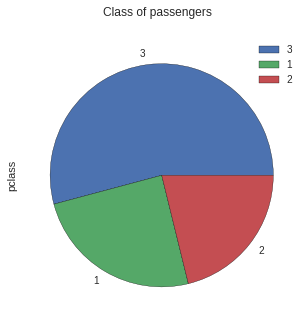

In [8]:
# We have no null values, so we can already process the data

# we plot the distribution on passengers in classes as a pie chart
pie(pd.DataFrame(titanic.pclass.value_counts()), title="Class of passengers")

# We also print the percentage of people in each of the class
pclass = titanic.groupby(["pclass"]).size()
#print(pclass)

print("%f%% of passengers are in 1st class"%(100*pclass[1]/pclass.sum()))
print("%f%% of passengers are in 2nd class"%(100*pclass[2]/pclass.sum()))
print("%f%% of passengers are in 3rd class"%(100*pclass[3]/pclass.sum()))

We can see here that most of the passengers were in third class. We can except that most of the people from the third class will die. (They were at the bottom of the boat)

### Sex

In [9]:
# we check that there are no null values in the sex column
np.sum(titanic.sex.isnull())

0

64.400306% of passengers are male
35.599694% of passengers are female


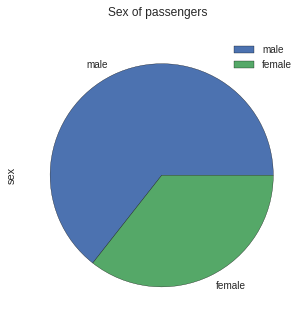

In [10]:
# We have no null values, so we can already process the data.

# plot
pie(pd.DataFrame(titanic.sex.value_counts()), title="Sex of passengers")

# We also print the percentage
sex = titanic.groupby(["sex"]).size()
#print(sex)

print("%f%% of passengers are male"%(100*sex["male"]/sex.sum()))
print("%f%% of passengers are female"%(100*sex["female"]/sex.sum()))

There was mostly men on the Titanic. We'll see if they had a higher survival rate than the women or not.

### Age

In [11]:
# we extract an age series with no null values and we describe it and plot a histogram of it
# we assume float values mean these are babies < 1 y.o. and leave it as it
# doesn't cause any problem
ages = titanic.loc[titanic.age.notnull()].age
ages.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

For the age, we have 1046 non null entries. The total number of entries is 1309.


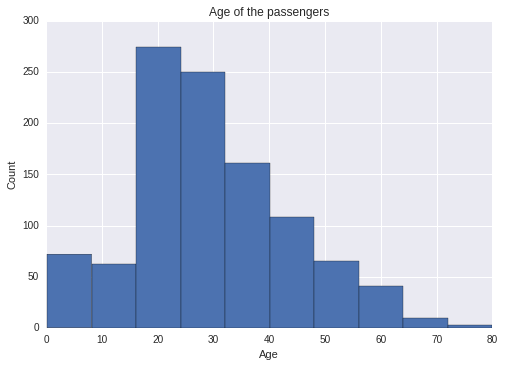

In [12]:
ages.hist()
plt.title("Age of the passengers")
plt.xlabel("Age")
plt.ylabel("Count")

print("For the age, we have %i non null entries. The total number of entries is %i."%(ages.count(), sex.sum()))

The age distribution is pretty good. We can see that there's a few children, a lot of adults, and some seniors. We will have a look at their survival rate. The next histogram shows the 4 categories: children, adolescentrs, adult and senior.

Now, we will create a new column with the categories of age. Then we check that the null values for the age remains null for the age categories.

In [13]:
# Create a new column for the age categories
age_cat = pd.cut(titanic.age, [0, 14, 20, 64, 200], labels=['children','adolescents','adults','seniors'])

titanic.loc[:, "age_cat"] = age_cat
titanic[14:17] # Have a look at line 15. It works.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
14,1,survivor,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",seniors
15,1,dead,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",NaN
16,1,dead,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",adults


For the age, we were careful about removing the null values. 
We found 1046 entries.
If pandas is clever, when we use the groupby for the age category and 
we ask it to sum, we should find the same value as above.
ages_cat.sum() = 1046

Pandas is clever!


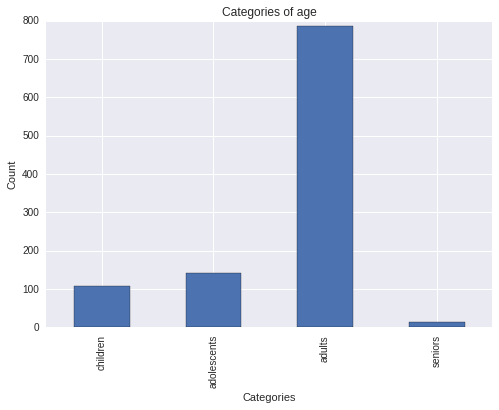

In [14]:
# Now, we can group the age categories and 
ages_cat = titanic.groupby(["age_cat"]).size()
ages_cat

ages_cat.plot(kind='bar', subplots=True)
plt.title("Categories of age")
plt.xlabel("Categories")
plt.ylabel("Count")

print("For the age, we were careful about removing the null values. \nWe found %i entries."%(ages.count()))
print("If pandas is clever, when we use the groupby for the age category and \nwe ask it to sum, we should find the same value as above.")
print("ages_cat.sum() = %i"%(ages_cat.sum()))
print()
if(ages_cat.sum() == ages.count()):
    print("Pandas is clever!")
else:
    print("Pandas is not clever! (We are)")



*Normally, the groupby function using should not take into account the null values. We also know that there are missing values only for the age. And since we checked that for the age it works fine, we can "trust" pandas for the rest of the tests.*

### Survival

In [15]:
# we check that there are no null values in the survive column
survived = titanic.survived.isnull()
np.sum(survived)

0

61.802903% of passengers died
38.197097% of passengers survived


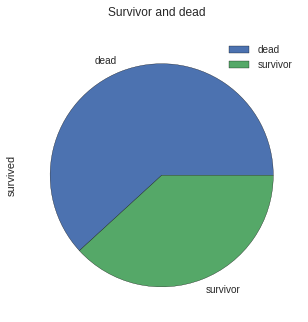

In [16]:
# Plot the proportion of survivors
pie(pd.DataFrame(titanic.survived.value_counts()), title="Survivor and dead")

survived = titanic.groupby(["survived"]).size()
#print(sex)

print("%f%% of passengers died"%(100*survived.loc["dead"]/survived.sum()))
print("%f%% of passengers survived"%(100*survived.loc["survivor"]/survived.sum()))

## Survival in function of the different attributes

Now, that we checked the proportion of male/female, the passenger class, the age, and the survival rate we can try to group these different information.


## Survival and sex

339 female survived
161 male survived
127 female died
682 male died

72.746781% female survived
19.098458% male survived


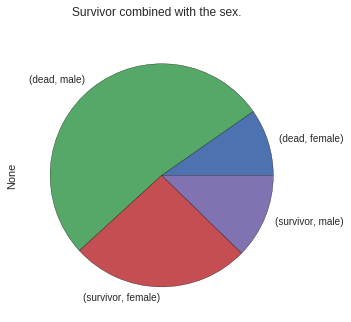

In [17]:
survivors_sex = titanic.groupby(["survived", "sex"]).size()
#print(survivors_sex)

# Print the different info
print("%i female survived"%survivors_sex.loc["survivor", "female"])
print("%i male survived"%survivors_sex.loc["survivor", "male"])
print("%i female died"%survivors_sex.loc["dead", "female"])
print("%i male died"%survivors_sex.loc["dead", "male"])
print()
print("%f%% female survived"%(100*survivors_sex.loc["survivor", "female"]
                                         /(survivors_sex.loc["survivor", "female"] + 
                                           survivors_sex.loc["dead", "female"])))
print("%f%% male survived"%(100*survivors_sex.loc["survivor", "male"]
                                       /(survivors_sex.loc["dead", "male"] + 
                                         survivors_sex.loc["survivor", "male"])))

# Create the graph
graph = pie(survivors_sex, title = "Survivor combined with the sex.")

We can already take two "conclusions" here: 
- The majority of male are dead
- The majority of female are alive

But we need to dig deeper in the data to take other conclusions 

## Survival and class

Before looking at the survival in function of the sex and class, we can already have a look at the survival rate in function of the sex

61.919505% of passenger in 1st class survived
42.960289% of passenger in 2nd class survived
25.528914% of passenger in 3rd class survived


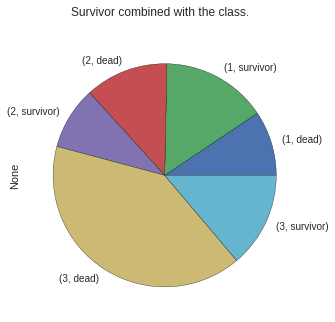

In [18]:
survivors_class = titanic.groupby(["pclass", "survived"]).size()
#print(survivors_class)

# Print the different info
print("%f%% of passenger in 1st class survived"%(100*survivors_class.loc[1, "survivor"]/
                                                 survivors_class.loc[1].sum()))
print("%f%% of passenger in 2nd class survived"%(100*survivors_class.loc[2, "survivor"]/
                                                 survivors_class.loc[2].sum()))
print("%f%% of passenger in 3rd class survived"%(100*survivors_class.loc[3, "survivor"]/
                                                 survivors_class.loc[3].sum()))

# Create the graph
graph = pie(survivors_class, title = "Survivor combined with the class.")

As we can see in the printed values and in the charts, the people from a better class always had a higher survival rate. This is quite logical since the people of the 3rd class (for example) had their room at the bottom of the ship.

## Survival, class and sex

Now, we combine the survival, the class and the sex. Let's see what happens

96.527778% female from class 1 survived
88.679245% female from class 2 survived
49.074074% female from class 3 survived

34.078212% male from class 1 survived
14.619883% male from class 2 survived
15.212982% male from class 3 survived


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fb19a07f0>], dtype=object)

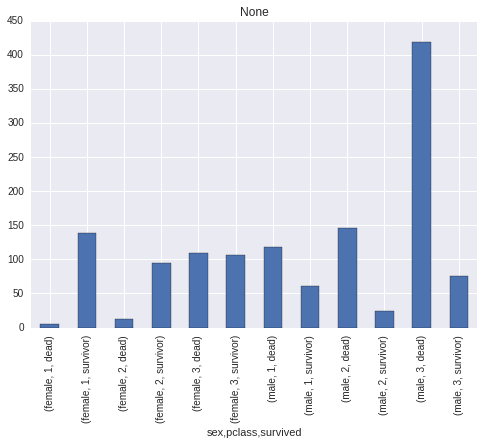

In [19]:
survivors_sex_class = titanic.groupby(["sex", "pclass", "survived"]).size()
#print(survivors_sex_class)

print("%f%% female from class 1 survived"%(100*survivors_sex_class.loc["female", 1, "survivor"]/
                                           survivors_sex_class.loc["female", 1].sum()))
print("%f%% female from class 2 survived"%(100*survivors_sex_class.loc["female", 2, "survivor"]/
                                           survivors_sex_class.loc["female", 2].sum()))
print("%f%% female from class 3 survived"%(100*survivors_sex_class.loc["female", 3, "survivor"]/
                                           survivors_sex_class.loc["female", 3].sum()))
print()
print("%f%% male from class 1 survived"%(100*survivors_sex_class.loc["male", 1, "survivor"]/
                                           survivors_sex_class.loc["male", 1].sum()))
print("%f%% male from class 2 survived"%(100*survivors_sex_class.loc["male", 2, "survivor"]/
                                           survivors_sex_class.loc["male", 2].sum()))
print("%f%% male from class 3 survived"%(100*survivors_sex_class.loc["male", 3, "survivor"]/
                                           survivors_sex_class.loc["male", 3].sum()))

# Graph
survivors_sex_class.plot(kind='bar', subplots=True)



Dealing with 3 different attributes is a bit difficult to read. But we can already see that the female from class 1 and 2 had a really high survival rate. The male from all the classes had a lower survival rate. So, we can already say that the women from class 1 and 2 are first, then the women from class 3 can be savec, and finally, the men if there are some places left.

## Survival and age
Now, we check the survival rate combined with the age categories


57.009346% children survived
37.588652% adolescents survived
39.617834% adults survived
15.384615% seniors survived


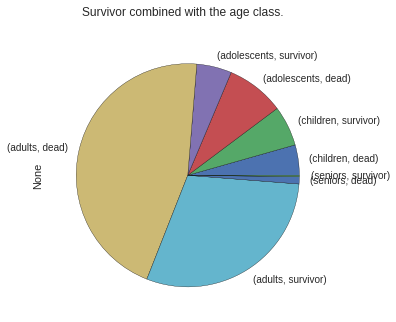

In [20]:
survivors_age = titanic.groupby(["age_cat", "survived"]).size()
#print(survivors_age)

print("%f%% children survived"%(100*survivors_age.loc["children", "survivor"]/
                                survivors_age.loc["children"].sum()))
print("%f%% adolescents survived"%(100*survivors_age.loc["adolescents", "survivor"]/
                                survivors_age.loc["adolescents"].sum()))
print("%f%% adults survived"%(100*survivors_age.loc["adults", "survivor"]/
                                survivors_age.loc["adults"].sum()))
print("%f%% seniors survived"%(100*survivors_age.loc["seniors", "survivor"]/
                                survivors_age.loc["seniors"].sum()))

# Graph
graph = pie(survivors_age, title = "Survivor combined with the age class.")


With these information, we can see that the children had the highest survival rate. The senior had the lowest. It would be interesting to have a look at the distribution of children in the class

## Children and class
We just check if the children were mostly in the 1st class or not.


6.542056% children were in 1st class
25.233645% children were in 2nd class
68.224299% children were in 3rd class


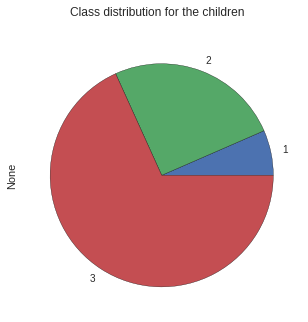

In [21]:
age_class = titanic.groupby(["age_cat", "pclass"]).size()
#print(survivors_age)

print("%f%% children were in 1st class"%(100*age_class.loc["children", 1]/
                                age_class.loc["children"].sum()))
print("%f%% children were in 2nd class"%(100*age_class.loc["children", 2]/
                                age_class.loc["children"].sum()))
print("%f%% children were in 3rd class"%(100*age_class.loc["children", 3]/
                                age_class.loc["children"].sum()))

# Graph
graph = pie(age_class.loc["children"], title = "Class distribution for the children")


Here, we can see an interesting result. Most of the children were in class 3. Let's see the survival rate of the children in function of the class

## Survival, children and class

In [22]:
survivors_class = titanic.groupby(["age_cat", "pclass", "survived"]).size()
#print(survivors_class)
children = survivors_class.loc["children"]

print("%f%% children from class 1 survived"%(100*children.loc[1, "survivor"]/
                                             children.loc[1].sum()))
print("%f%% children from class 2 survived"%(100*children.loc[2, "survivor"]/
                                             children.loc[2].sum()))
print("%f%% children from class 3 survived"%(100*children.loc[3, "survivor"]/
                                             children.loc[3].sum()))

85.714286% children from class 1 survived
96.296296% children from class 2 survived
39.726027% children from class 3 survived


Even if most of the children were in 3rd class, they had the lowest survival rate compared to the children in the higher class. 

## Conclusion

The sentence *Women and children first* is not that correct at the end. Of course, women and children had a higher survival rate compared to men. But at the end, **the class in which the people were was more important**. It's pretty logical since people from the 3rd class were mostly living at the bottom of the ship. Therefore, they would already die while being inside the boat and unable to join the other persons on the deck. 

But at the end, the sentence *Women and children first* is pretty accurate for the people who were able to join the deck. 